# Importação das bibliotecas

In [94]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('display.max_columns', None)
sns.set_palette('plasma')

# Importação e Visualização da base de dados

Importação da base de dados contendo as notas nulas em algumas linhas.

In [95]:
df_null = pd.read_csv('df_null.csv', sep=';', encoding='iso-8859-1')
df_null.head()

,NU_INSCRICAO,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,IDIOMA,STATUS DA REDAÇÃO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,RENDA,INTERNET,PRESENCA,NOTAS
0,210051567969,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,1,1,1,1,554.2,524.7,456.4,649.5,Inglês,Sem problemas,120.0,120.0,120.0,140.0,140.0,640.0,0.5,Sim,4,2824.8
1,210054292437,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,0,1,1,0,NaN,453.8,421.4,NaN,Inglês,Sem problemas,80.0,120.0,80.0,140.0,120.0,540.0,0.5,Sim,2,1415.2
2,210051340033,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,1,1,1,1,410.5,498.3,459.2,606.0,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,20.0,500.0,1.5,Sim,4,2474.0
3,210051891394,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,1,1,1,1,400.9,480.8,458.0,472.0,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,100.0,580.0,3.0,Sim,4,2391.7
4,210053720446,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,1,1,1,1,552.0,595.1,541.9,446.9,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,60.0,540.0,1.5,Sim,4,2675.9


Importação da base de dados contendo as notas corrigidas pelo método KNN.

In [96]:
df_knn = pd.read_csv('df_knn.csv', sep=';', encoding='ISO-8859-1')
df_knn.head()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,554.200000,524.7,456.4,649.500000,120.0,120.0,120.0,140.0,140.0,640.0
1,405.269967,453.8,421.4,482.724891,80.0,120.0,80.0,140.0,120.0,540.0
2,410.500000,498.3,459.2,606.000000,120.0,120.0,120.0,120.0,20.0,500.0
3,400.900000,480.8,458.0,472.000000,120.0,120.0,120.0,120.0,100.0,580.0
4,552.000000,595.1,541.9,446.900000,120.0,120.0,120.0,120.0,60.0,540.0


# Tratamento e Limpeza de Dados

Exclusão das colunas descenessárias para a análise com foco nas colunas referentes às notas com valores ausentes.

In [97]:
df_null.drop(columns=['NU_INSCRICAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1', 'NOTA_COMP2','NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO'],inplace=True)
df_null.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,RENDA,INTERNET,PRESENCA,NOTAS
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,Inglês,Sem problemas,0.5,Sim,4,2824.8
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,Inglês,Sem problemas,0.5,Sim,2,1415.2
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,Espanhol,Sem problemas,1.5,Sim,4,2474.0
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,Espanhol,Sem problemas,3.0,Sim,4,2391.7
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,Espanhol,Sem problemas,1.5,Sim,4,2675.9


### Concatenando as duas bases de dados:
- Base de Dados 1 -> Referente às informações gerais dos vestibulandos
- Base de Dados 2 -> Referente às notas dos vestibulandos

Juntando as notas corrigidas a base de dados com as outras informações sobre os candidatos.

In [98]:
df = pd.concat([df_null, df_knn], axis=1)
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,RENDA,INTERNET,PRESENCA,NOTAS,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,Inglês,Sem problemas,0.5,Sim,4,2824.8,554.200000,524.7,456.4,649.500000,120.0,120.0,120.0,140.0,140.0,640.0
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,Inglês,Sem problemas,0.5,Sim,2,1415.2,405.269967,453.8,421.4,482.724891,80.0,120.0,80.0,140.0,120.0,540.0
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,Espanhol,Sem problemas,1.5,Sim,4,2474.0,410.500000,498.3,459.2,606.000000,120.0,120.0,120.0,120.0,20.0,500.0
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,Espanhol,Sem problemas,3.0,Sim,4,2391.7,400.900000,480.8,458.0,472.000000,120.0,120.0,120.0,120.0,100.0,580.0
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,Espanhol,Sem problemas,1.5,Sim,4,2675.9,552.000000,595.1,541.9,446.900000,120.0,120.0,120.0,120.0,60.0,540.0


### Reordenando as posições das colunas

Para uma melhor estruturação da base de dados.

In [99]:
df = df[['FAIXA ETÁRIA', 'SEXO', 'COR/RAÇA', 'SITUAÇÃO DE CONCLUSÃO', 'TIPO DE ESCOLA', 'LOCALIZAÇÃO DA ESCOLA', 'NO_MUNICIPIO_PROVA', 'IDIOMA', 'STATUS DA REDAÇÃO', 'RENDA', 'INTERNET',
       'NOTA_CN', 'NOTA_MT', 'NOTA_CH', 'NOTA_LC', 'NOTA_COMP1', 'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO', 'NOTAS', 'PRESENCA']]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAIXA ETÁRIA           5038 non-null   object 
 1   SEXO                   5038 non-null   object 
 2   COR/RAÇA               5038 non-null   object 
 3   SITUAÇÃO DE CONCLUSÃO  5038 non-null   object 
 4   TIPO DE ESCOLA         5038 non-null   object 
 5   LOCALIZAÇÃO DA ESCOLA  5038 non-null   object 
 6   NO_MUNICIPIO_PROVA     5038 non-null   object 
 7   IDIOMA                 5038 non-null   object 
 8   STATUS DA REDAÇÃO      5038 non-null   object 
 9   RENDA                  5038 non-null   float64
 10  INTERNET               5038 non-null   object 
 11  NOTA_CN                5038 non-null   float64
 12  NOTA_MT                5038 non-null   float64
 13  NOTA_CH                5038 non-null   float64
 14  NOTA_LC                5038 non-null   float64
 15  NOTA

In [101]:
df2 = df.copy()

### Alterando a tipagem dos dados qualitativos

In [102]:
df['FAIXA ETÁRIA'] = df['FAIXA ETÁRIA'].astype('category')
df['SEXO'] = df['SEXO'].astype('category')
df['COR/RAÇA'] = df['COR/RAÇA'].astype('category')
df['SITUAÇÃO DE CONCLUSÃO'] = df['SITUAÇÃO DE CONCLUSÃO'].astype('category')
df['TIPO DE ESCOLA'] = df['TIPO DE ESCOLA'].astype('category')
df['LOCALIZAÇÃO DA ESCOLA'] = df['LOCALIZAÇÃO DA ESCOLA'].astype('category')
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].astype('category')
df['IDIOMA'] = df['IDIOMA'].astype('category')
df['STATUS DA REDAÇÃO'] = df['STATUS DA REDAÇÃO'].astype('category')
df['INTERNET'] = df['INTERNET'].astype('category')

### Dividindo todos os valores da coluna NOTAS para termos uma média aritmética dos vestibulandos.

In [103]:
df.loc[:, 'NOTAS'] /= 5

In [104]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,RENDA,INTERNET,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,Inglês,Sem problemas,0.5,Sim,554.200000,649.500000,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,Inglês,Sem problemas,0.5,Sim,405.269967,482.724891,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,Espanhol,Sem problemas,1.5,Sim,410.500000,606.000000,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,Espanhol,Sem problemas,3.0,Sim,400.900000,472.000000,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,Espanhol,Sem problemas,1.5,Sim,552.000000,446.900000,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4


### Verificação final da existência dos valores ausentes

In [105]:
df.isnull().sum()

FAIXA ETÁRIA             0
SEXO                     0
COR/RAÇA                 0
SITUAÇÃO DE CONCLUSÃO    0
TIPO DE ESCOLA           0
LOCALIZAÇÃO DA ESCOLA    0
NO_MUNICIPIO_PROVA       0
IDIOMA                   0
STATUS DA REDAÇÃO        0
RENDA                    0
INTERNET                 0
NOTA_CN                  0
NOTA_MT                  0
NOTA_CH                  0
NOTA_LC                  0
NOTA_COMP1               0
NOTA_COMP2               0
NOTA_COMP3               0
NOTA_COMP4               0
NOTA_COMP5               0
NOTA_REDACAO             0
NOTAS                    0
PRESENCA                 0
dtype: int64

A partir desse momento, tem-se uma base de dados sem nenhuma valor ausente e pronta para ser analisada.

# Análise Exploratória dos Dados

In [106]:
df.describe()

,RENDA,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
count,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.00000,5038.000000,5038.000000
mean,1.733823,482.295508,524.468547,508.989831,492.442692,117.648698,139.869481,115.462530,128.174815,115.418596,616.57412,515.616554,3.906312
std,2.924758,77.230596,107.256564,96.021467,78.897466,34.539284,46.483088,37.321705,39.929524,59.494668,193.76855,103.612505,0.431944
min,0.000000,0.000000,354.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,66.020000,2.000000
25%,0.500000,424.325000,438.125000,435.700000,438.325000,100.000000,120.000000,100.000000,120.000000,80.000000,520.00000,455.800000,4.000000
50%,0.500000,470.650000,500.350000,506.750000,495.100000,120.000000,120.000000,120.000000,120.000000,120.000000,600.00000,513.510000,4.000000
75%,1.500000,531.575000,596.900000,577.675000,546.350000,140.000000,180.000000,140.000000,160.000000,160.000000,740.00000,581.195000,4.000000
max,21.000000,778.600000,953.100000,832.500000,740.300000,200.000000,200.000000,200.000000,200.000000,200.000000,980.00000,833.440000,6.000000


## Análise Unidimensional
- Objetivo: Entender como cada variável da base de dados se comporta.

### FAIXA ETÁRIA

In [107]:
df['FAIXA ETÁRIA'].cat.categories

Index(['17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos',
       '23 anos', '24 anos', '25 anos', 'Entre 26 e 30 anos',
       'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 41 e 45 anos',
       'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos',
       'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Menor de 17 anos'],
      dtype='object')

In [108]:
hue_order_idade = ['Menor de 17 anos','17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos',
       '23 anos', '24 anos', '25 anos', 'Entre 26 e 30 anos',
       'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 41 e 45 anos',
       'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos',
       'Entre 61 e 65 anos', 'Entre 66 e 70 anos']

In [110]:
print(df['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head())
print(df['FAIXA ETÁRIA'].value_counts(normalize=True).sort_values(ascending=False).head()*100)

18 anos               1398
17 anos                998
19 anos                734
20 anos                450
Entre 26 e 30 anos     266
Name: FAIXA ETÁRIA, dtype: int64
18 anos               27.749107
17 anos               19.809448
19 anos               14.569274
20 anos                8.932116
Entre 26 e 30 anos     5.279873
Name: FAIXA ETÁRIA, dtype: float64


In [111]:
df['FAIXA ETÁRIA'].value_counts(normalize=True).sort_values(ascending=False).head(3).sum() * 100

62.12782850337436

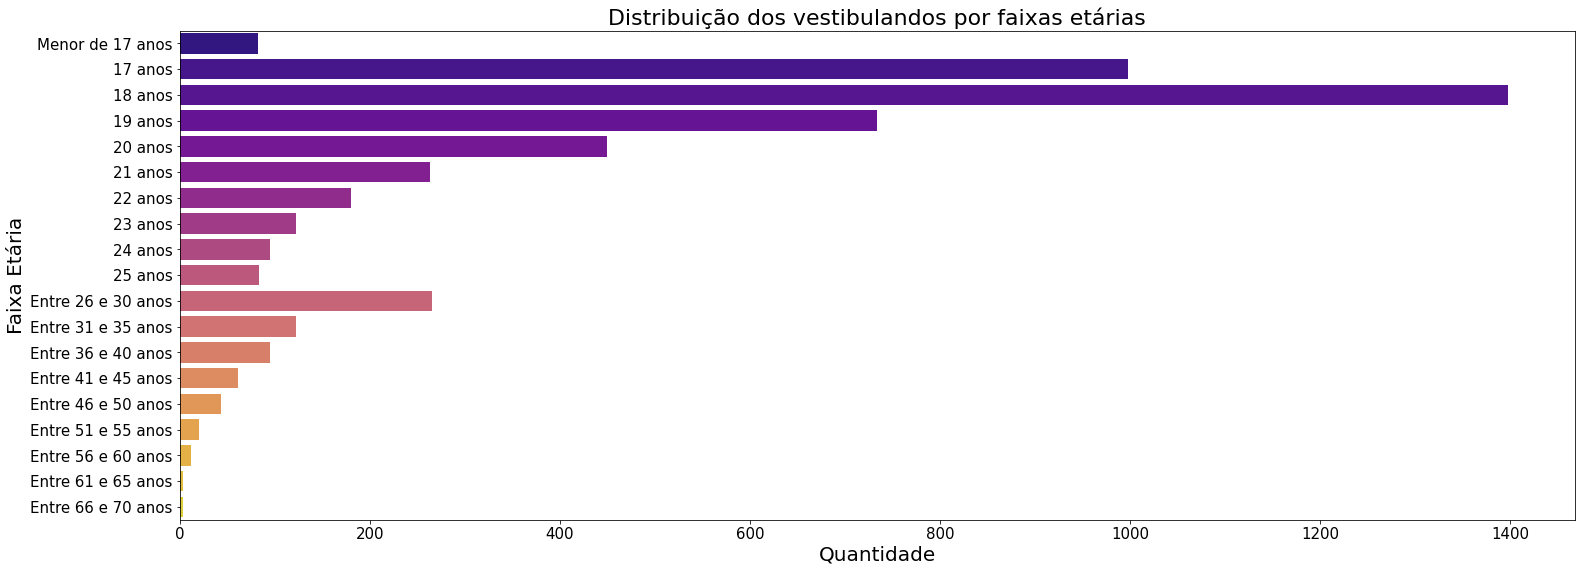

In [109]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(y = 'FAIXA ETÁRIA',
                   data = df,
                   order = hue_order_idade,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por faixas etárias', fontsize=22)
plt.ylabel('Faixa Etária', fontsize=20)
plt.xlabel('Quantidade', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **A faixa etária com a maior frequência dessa base de dados é a faixa etária dos 17 anos até 19 anos, representando cerca de 62,12% dos vestibulandos.**

### SEXO

In [113]:
print(df['SEXO'].value_counts().sort_index().head())
print(df['SEXO'].value_counts(normalize=True).sort_index().head()*100)

F    3084
M    1954
Name: SEXO, dtype: int64
F    61.214768
M    38.785232
Name: SEXO, dtype: float64


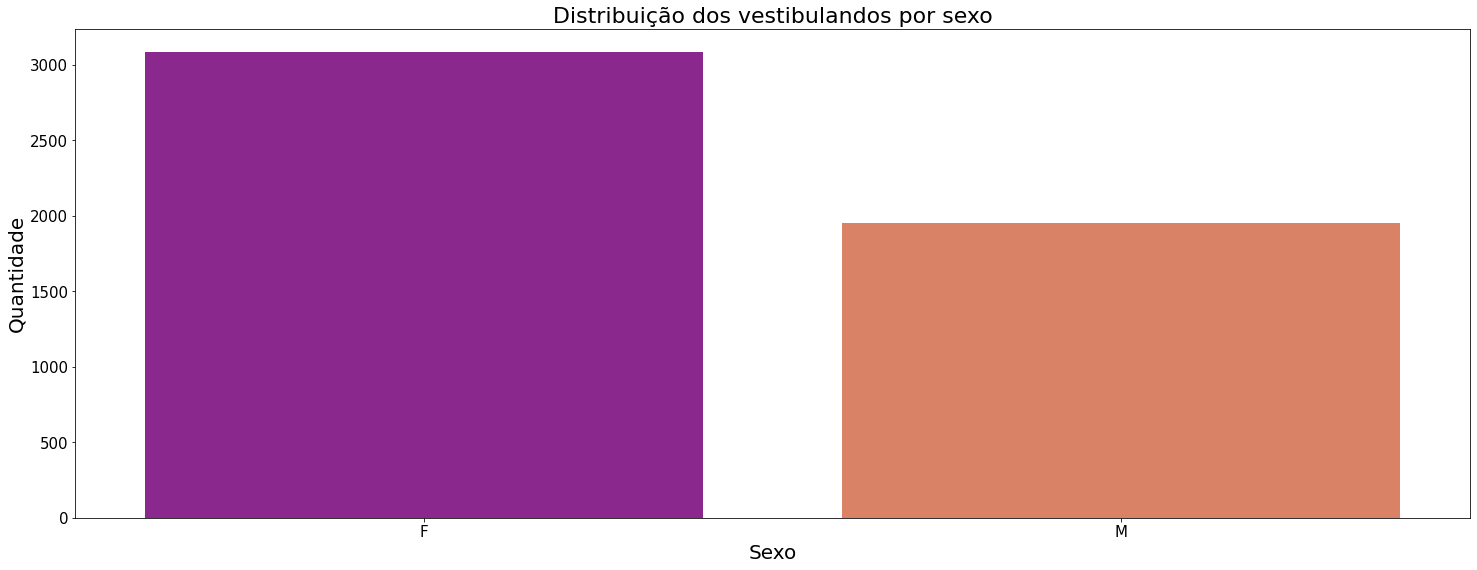

In [112]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'SEXO',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por sexo', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Sexo', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

- **As mulheres representam a maioria da base de dados, totalizando cerca de 61,21%. Já os homens representam 38,78% da base de dados.**

### COR/RAÇA

In [115]:
print(df['COR/RAÇA'].value_counts().sort_values(ascending=False).head())
print(df['COR/RAÇA'].value_counts(normalize=True).sort_values(ascending=False).head()*100)

Parda            2466
Branca           1687
Preta             580
Não declarado     114
Amarela           110
Name: COR/RAÇA, dtype: int64
Parda            48.947995
Branca           33.485510
Preta            11.512505
Não declarado     2.262803
Amarela           2.183406
Name: COR/RAÇA, dtype: float64


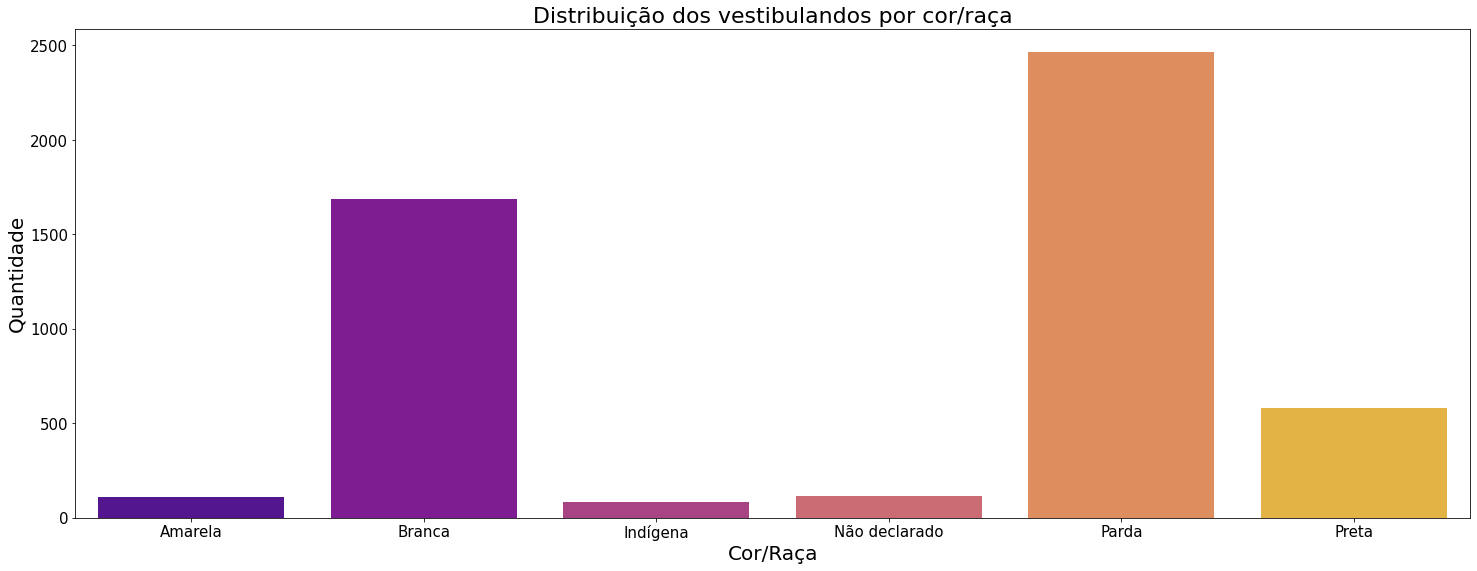

In [114]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'COR/RAÇA',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por cor/raça', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Cor/Raça', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **A cor/raça com mais frequência na base de dados foi a parda (48,94%), seguido da branca (33,48%). Os vestibulandos declarados da cor/raça preta representa 11,51%.**

### SITUAÇÃO DE CONCLUSÃO

In [117]:
df['SITUAÇÃO DE CONCLUSÃO'].value_counts(normalize=True).sort_values(ascending=True)*100

Não concluí e não estou cursando o EM        0.317586
Estou cursando e concluirei o EM em 2021    43.985709
Já concluí o EM                             55.696705
Name: SITUAÇÃO DE CONCLUSÃO, dtype: float64

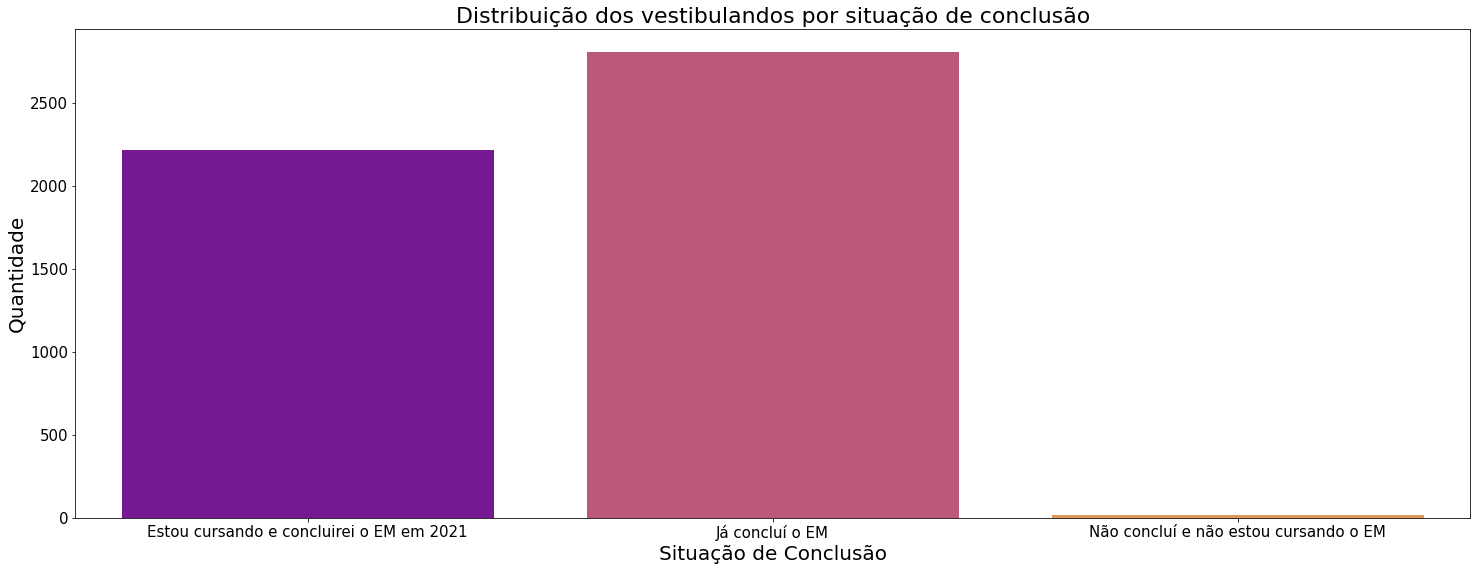

In [116]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'SITUAÇÃO DE CONCLUSÃO',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por situação de conclusão', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Situação de Conclusão', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Mais da metade dos vestibulandos dentro dessa amostra de 5% da base de dados original concluíram o ensino médio (55,69%). Aproximadamente das pessoas ainda estavam cursando e concluíram o ensino médio em 2021. Além disso, menos de 1% da amostra não concluiu e nem estava cursando o ensino médio.**

### TIPO DE ESCOLA

In [119]:
df['TIPO DE ESCOLA'].value_counts(normalize=True).sort_values(ascending=False)*100

Não respondeu    56.014291
Público          36.224692
Privada           7.761016
Name: TIPO DE ESCOLA, dtype: float64

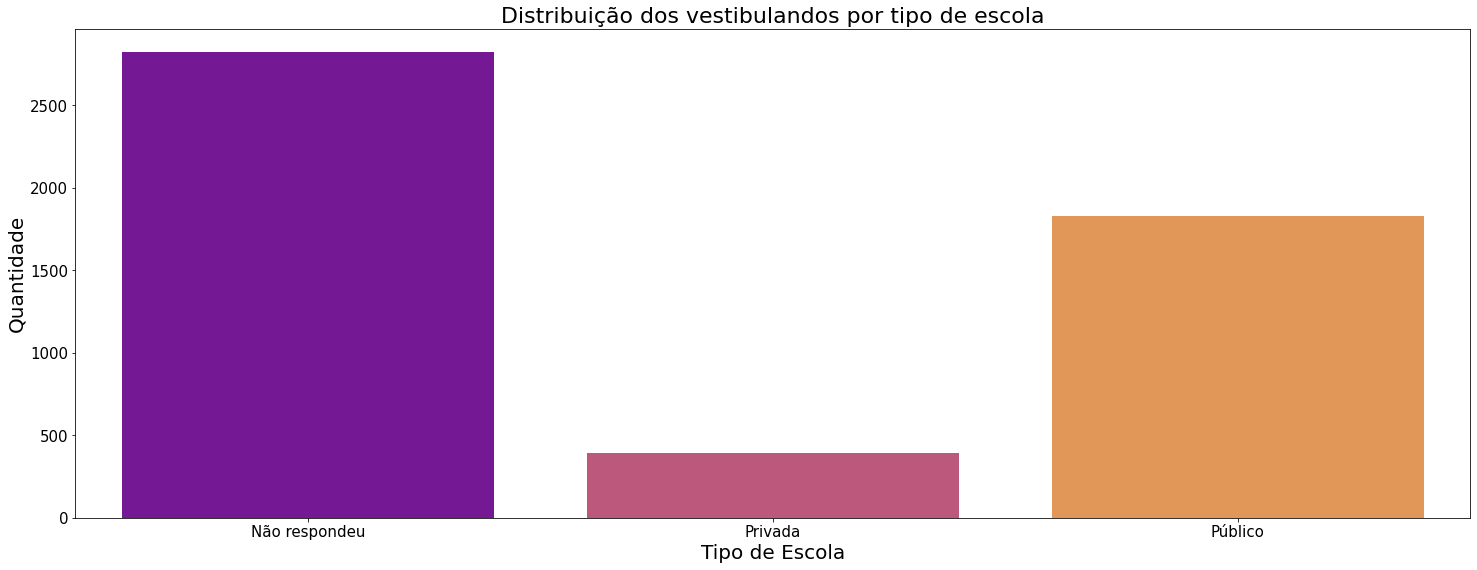

In [118]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'TIPO DE ESCOLA',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por tipo de escola', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Tipo de Escola', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Dentre as pessoas que responderam ao formulário sobre o tipo de escola que estudaram ou estavam estudando, cerca de 36,22% respoderam que são/foram da escola pública e 7,76% respoderam que são/foram da escola privada.**

### INTERNET

In [121]:
df['INTERNET'].value_counts(normalize=True)*100

Sim    91.86185
Não     8.13815
Name: INTERNET, dtype: float64

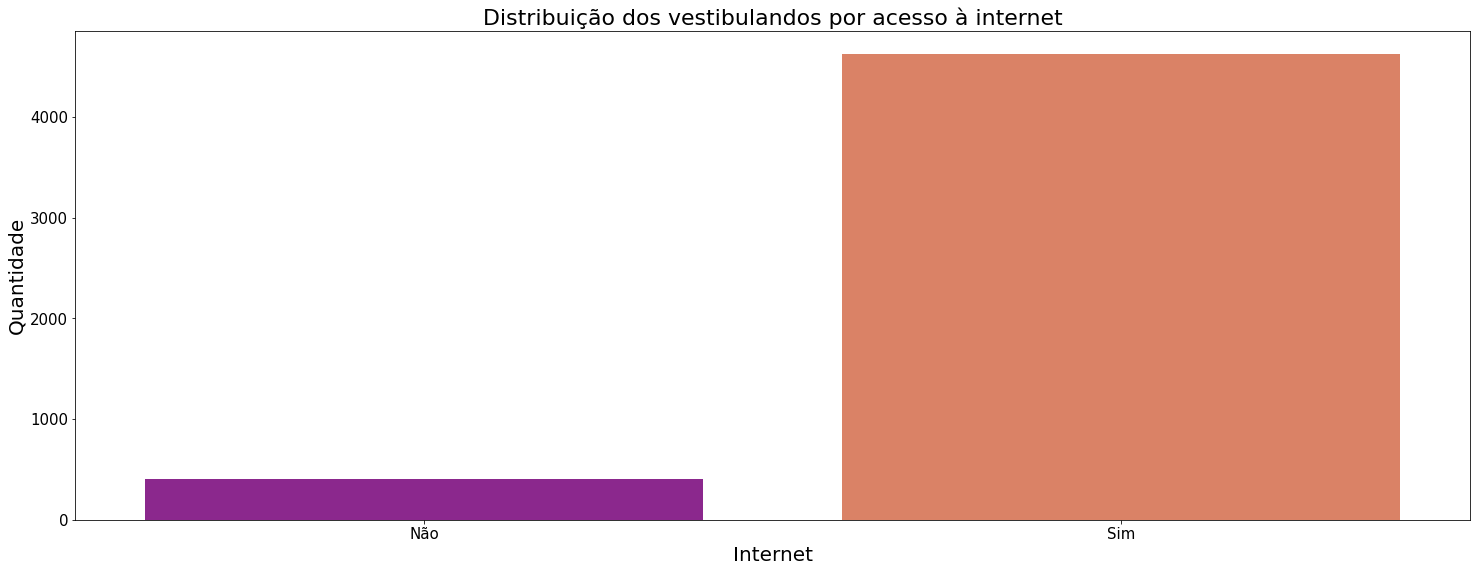

In [120]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'INTERNET',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por acesso à internet', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Internet', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Diante da amostra, 91,86% dos vestibulandos responderam que possuem acesso à internet, enquanto 8,13% não tem acesso a rede de internet.**

### MUNICÍPIOS

In [122]:
df.NO_MUNICIPIO_PROVA.value_counts()

Recife                     1186
Petrolina                   311
Jaboatão dos Guararapes     250
Caruaru                     219
Paulista                    198
                           ... 
Parnamirim                    9
Agrestina                     8
Água Preta                    7
Fernando de Noronha           3
Barra de Guabiraba            1
Name: NO_MUNICIPIO_PROVA, Length: 84, dtype: int64

In [123]:
max(df.NO_MUNICIPIO_PROVA.value_counts())

1186

In [125]:
df['NO_MUNICIPIO_PROVA'].value_counts(normalize=True).sort_values(ascending=False).head()*100

Recife                     23.541088
Petrolina                   6.173085
Jaboatão dos Guararapes     4.962287
Caruaru                     4.346963
Paulista                    3.930131
Name: NO_MUNICIPIO_PROVA, dtype: float64

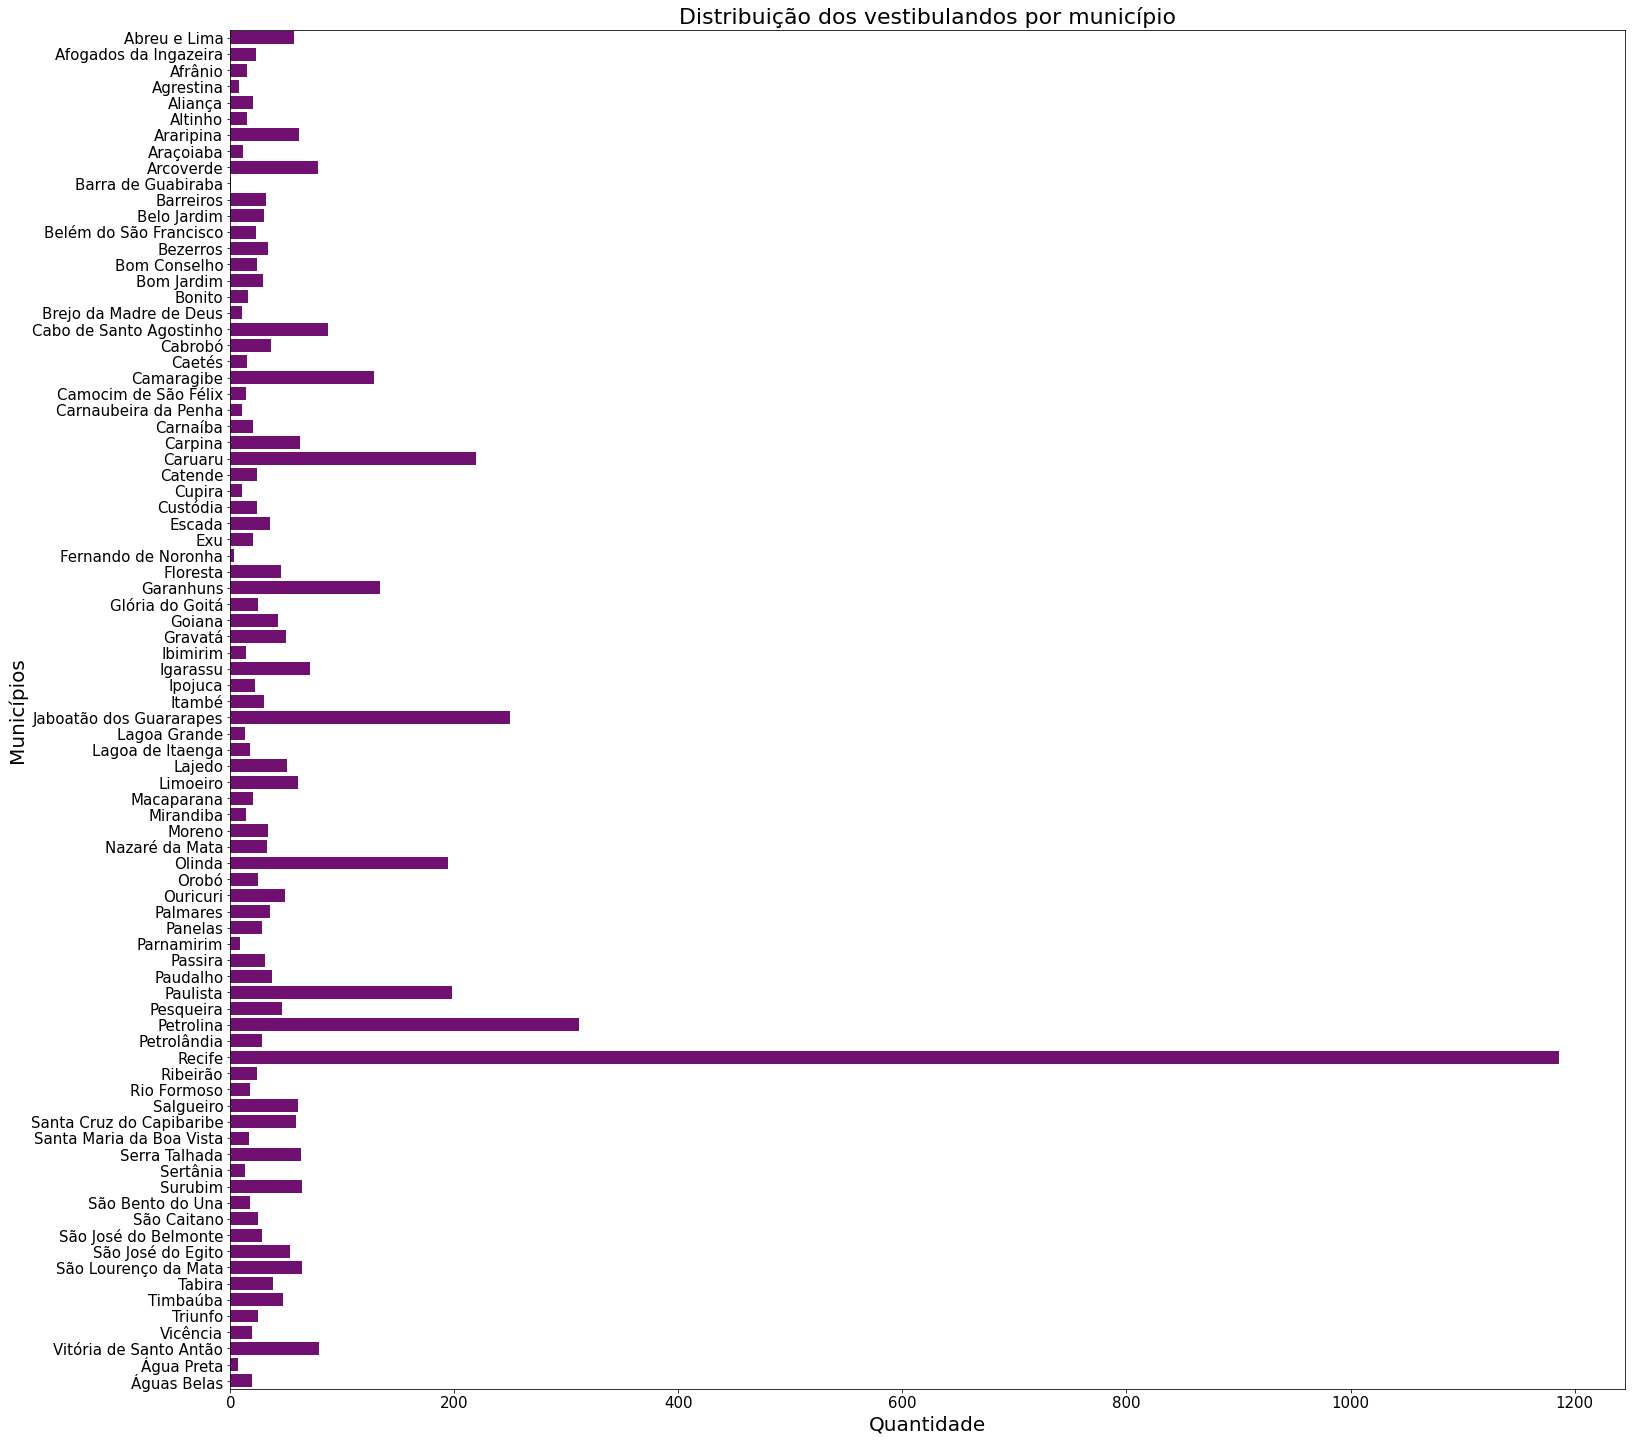

In [124]:
clrs = ['lightgrey' if (x > max(df.NO_MUNICIPIO_PROVA.value_counts())) else 'purple' for x in df.NO_MUNICIPIO_PROVA.value_counts()]

fig, ax = plt.subplots(figsize=(25,25))
ax = sns.countplot(y = 'NO_MUNICIPIO_PROVA',
                   data = df,
                   palette = clrs)
ax.set_title('Distribuição dos vestibulandos por município', fontsize=22)
plt.ylabel('Municípios',fontsize=20)
plt.xlabel('Quantidade', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Apenas a cidade do Recife representa cerca de 23,54% da amostra. Logo em seguida tem a cidade de Petrolina com 6,17% e Jaboatão dos Guararapes com 4,96%.**

### IDIOMA

In [127]:
df['IDIOMA'].value_counts(normalize=True)*100

Inglês      53.25526
Espanhol    46.74474
Name: IDIOMA, dtype: float64

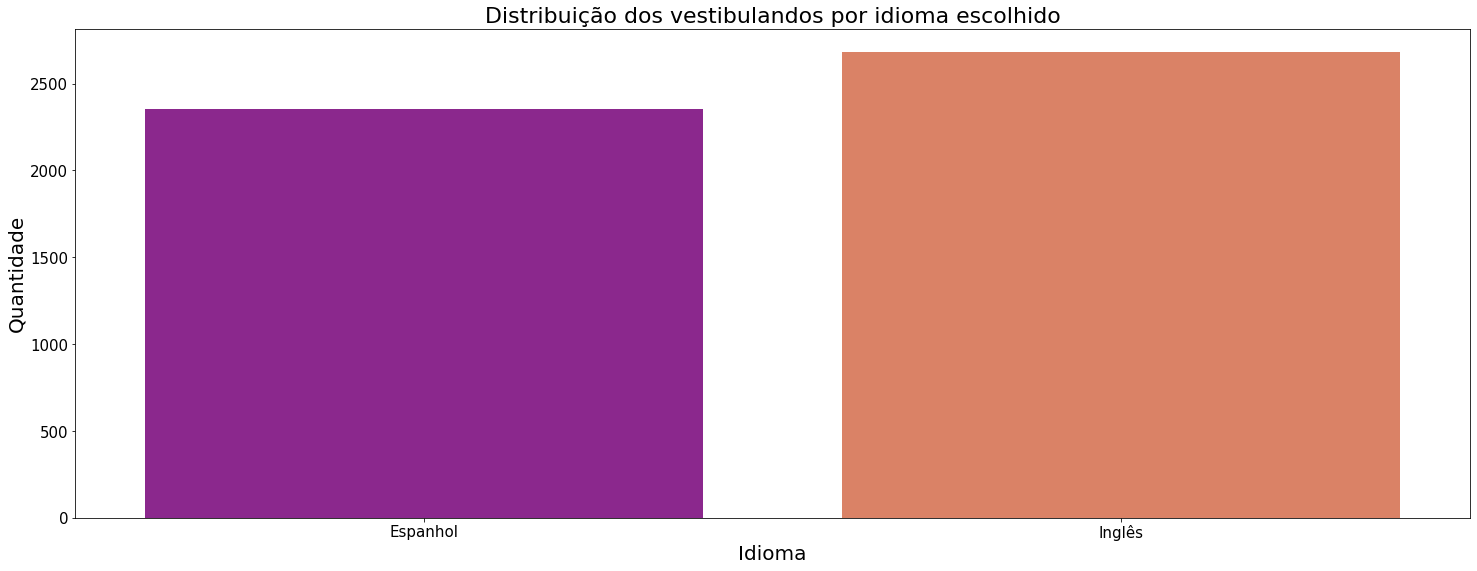

In [126]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(x = 'IDIOMA',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por idioma escolhido', fontsize=22)
plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Idioma', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **53,25% da amostra preferiram o idioma inglês para compor as questões na prova de Linguagens, enquanto 46,74% dos candidatos da amostra escolheram o espanhol.**

### STATUS DA REDAÇÃO

In [129]:
df['STATUS DA REDAÇÃO'].value_counts(normalize=True).sort_values(ascending=False)*100

Sem problemas                      96.248511
Em Branco                           1.568083
Fuga ao tema                        1.151250
Cópia Texto Motivador               0.337435
Texto insuficiente                  0.238190
Não Consta                          0.178642
Parte desconectada                  0.138944
Anulada                             0.099246
Não atendimento ao tipo textual     0.039698
Name: STATUS DA REDAÇÃO, dtype: float64

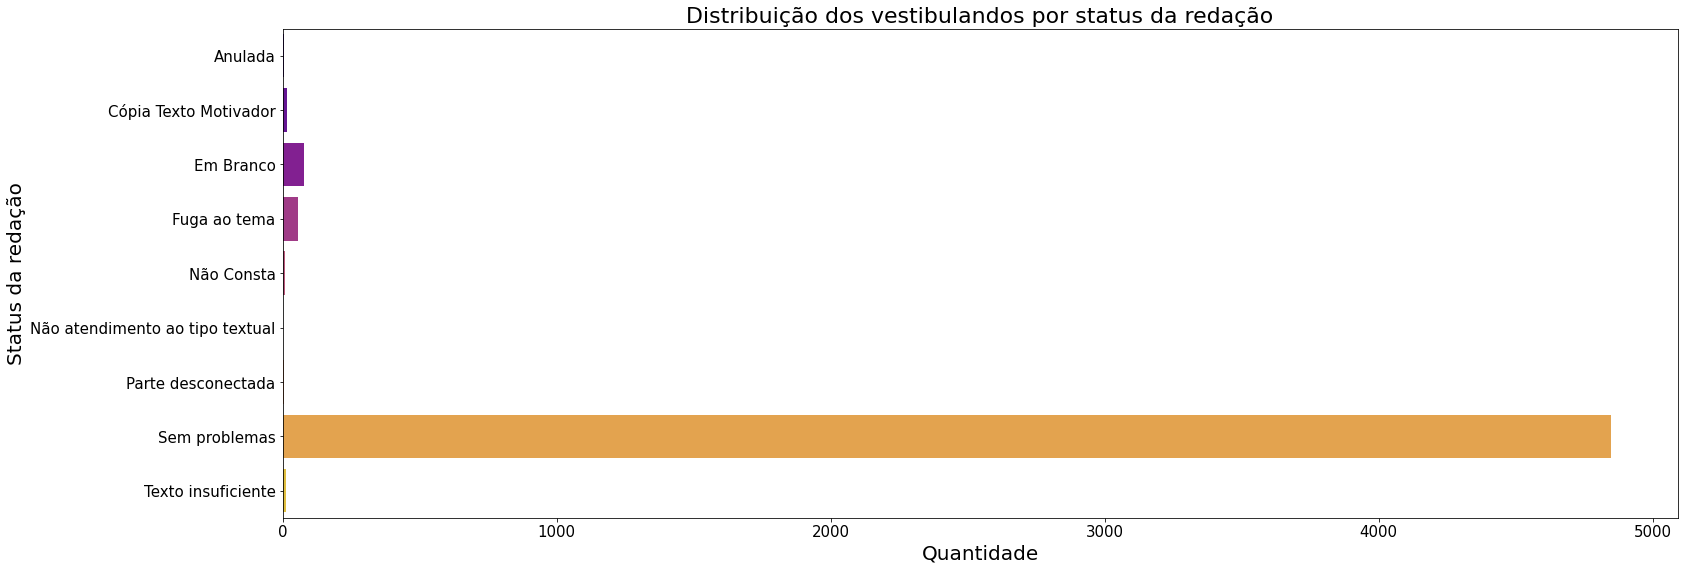

In [128]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.countplot(y = 'STATUS DA REDAÇÃO',
                   data = df,
                   palette = 'plasma')
ax.set_title('Distribuição dos vestibulandos por status da redação', fontsize=22)
plt.xlabel('Quantidade',fontsize=20)
plt.ylabel('Status da redação', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **96,24% da amostra não tiveram problemas na prova de redação. Apenas 1,56% dos vestibulandos deixaram a redação em branco e 1,15% fugiram do tema.**

### NOTAS POR ÁREA DE CONHECIMENTO

In [131]:
notas.describe()

,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_REDACAO
count,5038.000000,5038.000000,5038.000000,5038.000000,5038.00000
mean,482.295508,524.468547,508.989831,492.442692,616.57412
std,77.230596,107.256564,96.021467,78.897466,193.76855
min,0.000000,354.500000,0.000000,0.000000,0.00000
25%,424.325000,438.125000,435.700000,438.325000,520.00000
50%,470.650000,500.350000,506.750000,495.100000,600.00000
75%,531.575000,596.900000,577.675000,546.350000,740.00000
max,778.600000,953.100000,832.500000,740.300000,980.00000


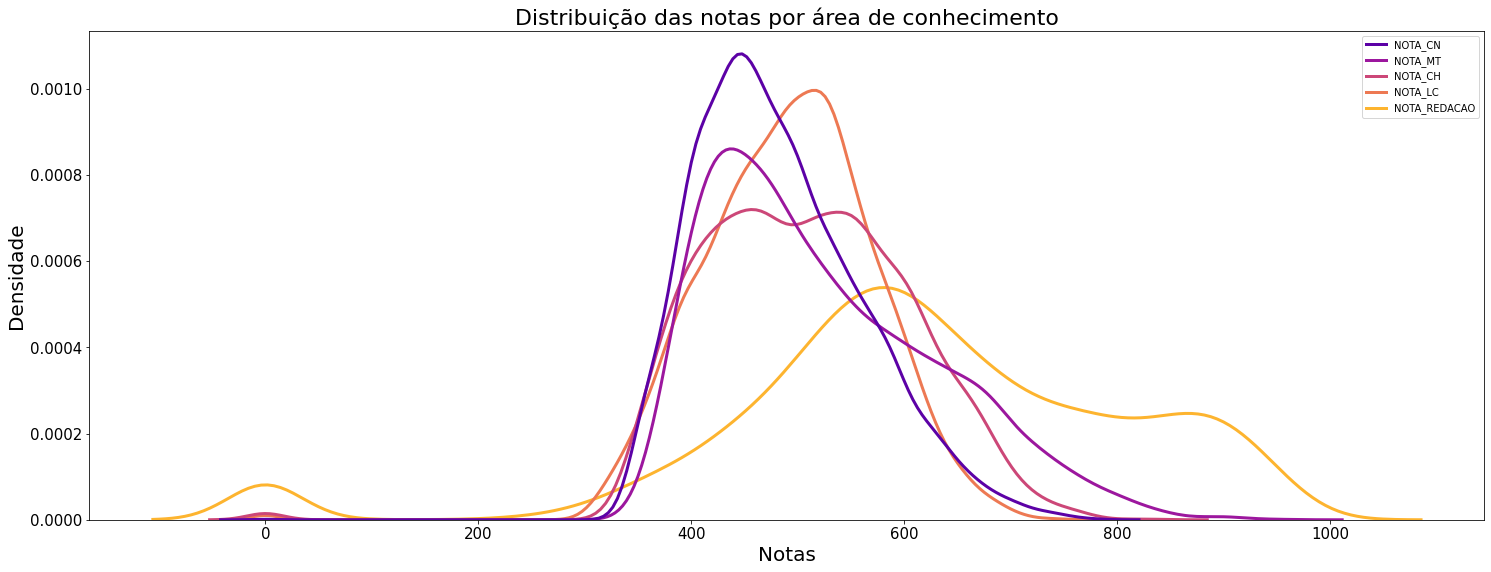

In [130]:
notas = df[['NOTA_CN', 'NOTA_MT', 'NOTA_CH', 'NOTA_LC', 'NOTA_REDACAO']]

fig, ax = plt.subplots(figsize=(25,9))
ax = sns.kdeplot(data=df[['NOTA_CN', 'NOTA_MT', 'NOTA_CH', 'NOTA_LC', 'NOTA_REDACAO']], linewidth=3, palette = 'plasma')
ax.set_title('Distribuição das notas por área de conhecimento', fontsize=22)
plt.xlabel('Notas',fontsize=20)
plt.ylabel('Densidade', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **O comportamento das notas da amostra da base de dados é muito similar quando se compara as áreas do conhecimento dos dois primeiros dias com exceção da nota de redação. Pode-se notar, por exemplo, que 50% dos vestibulandos atingiram notas parecidas em Ciência da Natureza, Matemática, Ciências Humanas e Linguagens.**

## Análise Bivariada/Multivariada
- Objetivo: Entender o comportamento de duas ou mais variáveis sendo analisadas ao mesmo tempo.

### NOTAS DE CADA ÁREA POR TIPO DE ESCOLA

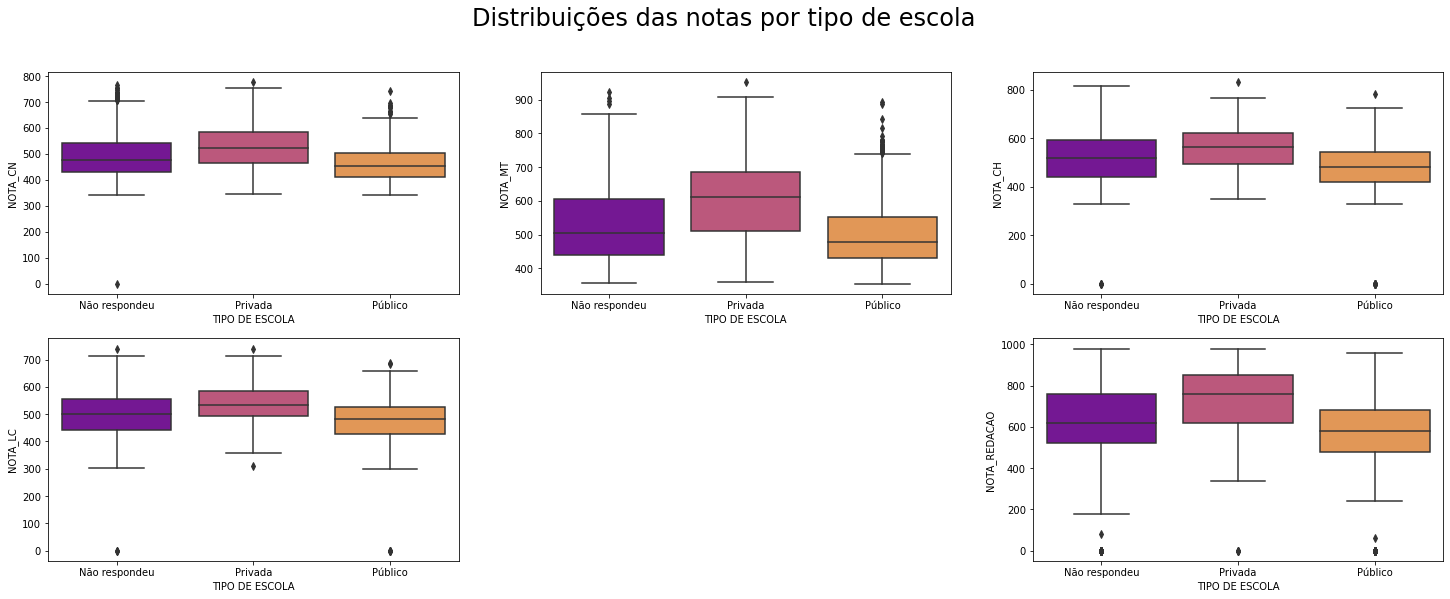

In [132]:
fig, ax = plt.subplots(figsize=(25,9))

plt.subplot(2,3,1)
ax1 = sns.boxplot(data=df,x='TIPO DE ESCOLA', y='NOTA_CN', palette = 'plasma')

plt.subplot(2,3,2)
ax2 = sns.boxplot(data=df,x='TIPO DE ESCOLA', y='NOTA_MT', palette = 'plasma')

plt.subplot(2,3,3)
ax3 = sns.boxplot(data=df,x='TIPO DE ESCOLA', y='NOTA_CH', palette = 'plasma')

plt.subplot(2,3,4)
ax4 = sns.boxplot(data=df,x='TIPO DE ESCOLA', y='NOTA_LC', palette = 'plasma')

plt.subplot(2,3,6)
ax5 = sns.boxplot(data=df,x='TIPO DE ESCOLA', y='NOTA_REDACAO', palette = 'plasma')

fig.suptitle('Distribuições das notas por tipo de escola', fontsize=24)
plt.show()


In [133]:
del notas['NOTA_REDACAO']
notas

,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC
0,554.200000,649.500000,524.7,456.4
1,405.269967,482.724891,453.8,421.4
2,410.500000,606.000000,498.3,459.2
3,400.900000,472.000000,480.8,458.0
4,552.000000,446.900000,595.1,541.9
...,...,...,...,...
5033,473.600000,425.400000,531.6,580.1
5034,618.500000,613.700000,624.6,571.6
5035,449.200000,474.300000,521.3,466.3
5036,428.400000,417.400000,365.7,451.3


### TIPO DE ESCOLA X MÉDIAS DAS NOTAS

In [134]:
escola_media = df.groupby('TIPO DE ESCOLA')['NOTAS'].mean().sort_values(ascending=False)
escola_media = pd.DataFrame(escola_media)
escola_media.reset_index(inplace=True)
escola_media

,TIPO DE ESCOLA,NOTAS
0,Privada,588.028491
1,Não respondeu,522.727597
2,Público,489.106729


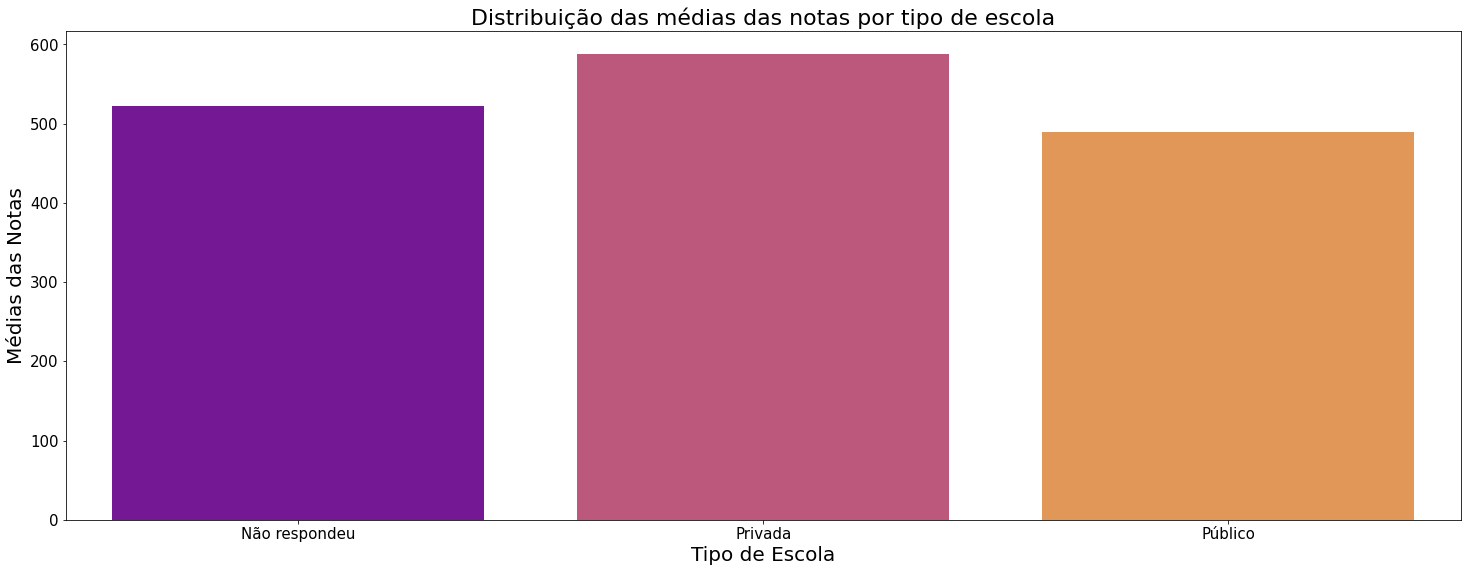

In [135]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.barplot(data=escola_media,x='TIPO DE ESCOLA', y='NOTAS', palette = 'plasma')
ax.set_title('Distribuição das médias das notas por tipo de escola', fontsize=22)
plt.xlabel('Tipo de Escola',fontsize=20)
plt.ylabel('Médias das Notas', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Pode-se perceber através dos boxplots que em geral a média das notas finais dos vestibulandos das escolas privadas são maiores do que os estudantes da escola pública.**

### IDIOMA X NOTA DE LINGUAGENS

In [136]:
idioma_media_lc = df.groupby('IDIOMA')['NOTA_LC'].mean().sort_values(ascending=False)
idioma_media_lc = pd.DataFrame(idioma_media_lc)
idioma_media_lc.reset_index(inplace=True)
idioma_media_lc

,IDIOMA,NOTA_LC
0,Inglês,507.855328
1,Espanhol,474.883413


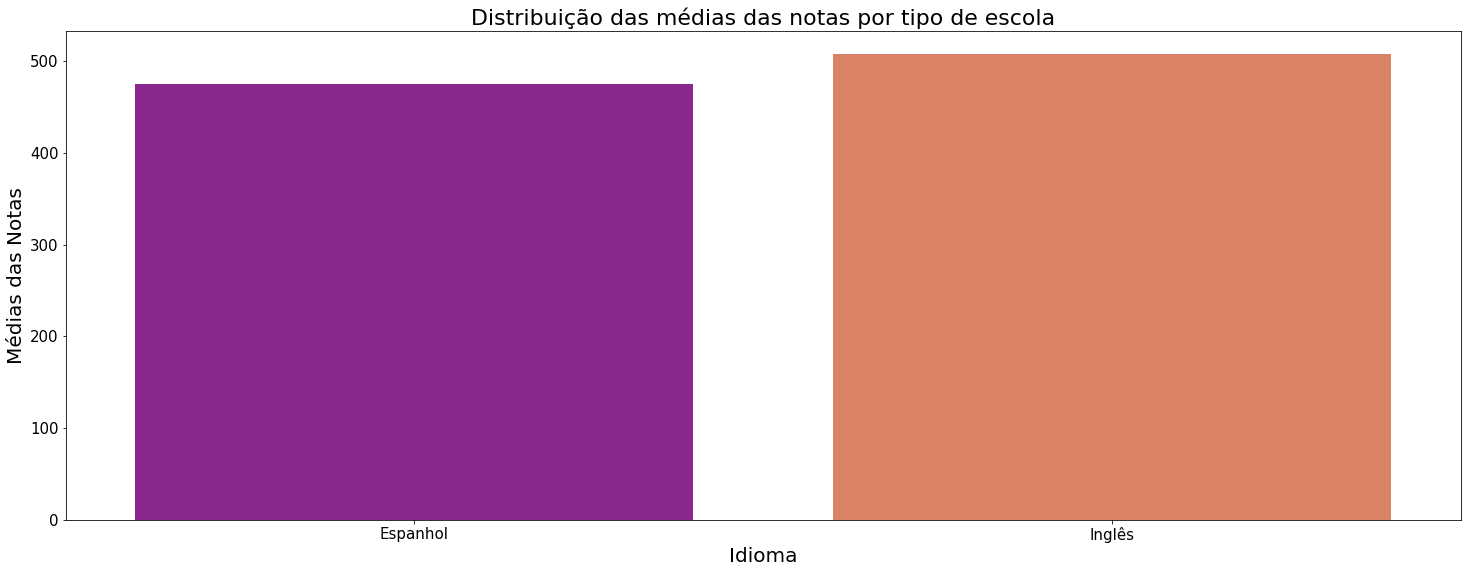

In [137]:
fig, ax = plt.subplots(figsize=(25,9))
ax = sns.barplot(data=idioma_media_lc ,x='IDIOMA', y='NOTA_LC', palette = 'plasma')
ax.set_title('Distribuição das médias das notas por tipo de escola', fontsize=22)
plt.xlabel('Idioma',fontsize=20)
plt.ylabel('Médias das Notas', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

### RENDA X MÉDIA DAS NOTAS FINAIS

In [138]:
renda_media_final = df.groupby('RENDA')['NOTAS'].mean()
renda_media_final = pd.DataFrame(renda_media_final)
renda_media_final.reset_index(inplace=True)
renda_media_final

,RENDA,NOTAS
0,0.0,465.260766
1,0.5,484.216014
2,1.0,518.278875
3,1.5,532.420238
4,2.0,546.746972
5,2.5,553.314215
6,3.0,573.465682
7,4.0,588.687092
8,5.0,596.075765
9,6.0,607.055472


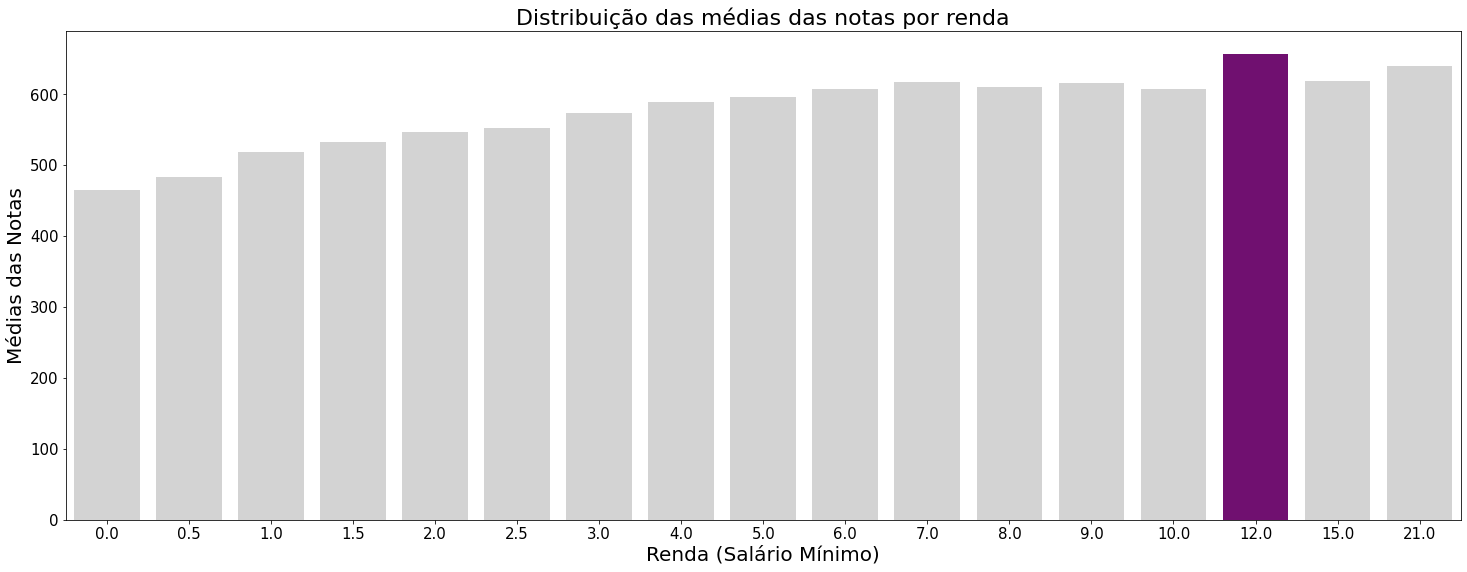

In [139]:
clrs = ['lightgrey' if (x < max(renda_media_final['NOTAS'])) else 'purple' for x in renda_media_final['NOTAS'] ]

fig, ax = plt.subplots(figsize=(25,9))
ax = sns.barplot(data=renda_media_final , x='RENDA', y='NOTAS',
                 palette = clrs)
ax.set_title('Distribuição das médias das notas por renda', fontsize=22)
plt.ylabel('Médias das Notas',fontsize=20)
plt.xlabel('Renda (Salário Mínimo)', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

> **Usou-se o salário mínimo de 2019 (R$998,00) como base nas perguntas. Percebe-se que a maior média de notas foi obtida por aqueles que tem renda de 12 salários mínimos**


# Perguntas - Enem 2021

### 1. Qual a faixa etária que mais participou do Enem 2021?

In [140]:
print(df2['FAIXA ETÁRIA'].value_counts().head())
print(df2['FAIXA ETÁRIA'].value_counts(normalize=True).head()*100)

18 anos               1398
17 anos                998
19 anos                734
20 anos                450
Entre 26 e 30 anos     266
Name: FAIXA ETÁRIA, dtype: int64
18 anos               27.749107
17 anos               19.809448
19 anos               14.569274
20 anos                8.932116
Entre 26 e 30 anos     5.279873
Name: FAIXA ETÁRIA, dtype: float64


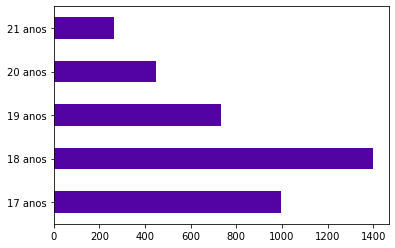

In [141]:
df2['FAIXA ETÁRIA'].value_counts().sort_index().head().plot(kind='barh')
plt.show()

> A faixa etária que mais participou do Enem 2021 foi a de 17-19 anos, representando cerca de 62,1% da base de dados dos vestibulandos, tendo como destaque os inscritos de 18 anos de idade atingindo 27,74% da base de dados.

### 2. De quais cidades esses vestibulandos com idades de 17 a 19 anos são provenientes?

In [142]:
df_menor20 = df2[df2['FAIXA ETÁRIA'] < '20 anos']

In [143]:
df_menor20.groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head(10)

NO_MUNICIPIO_PROVA       FAIXA ETÁRIA
Recife                   18 anos         293
                         17 anos         211
                         19 anos         175
Petrolina                18 anos          73
Jaboatão dos Guararapes  18 anos          62
Caruaru                  18 anos          58
Jaboatão dos Guararapes  17 anos          58
Petrolina                19 anos          56
                         17 anos          54
Paulista                 18 anos          48
Name: FAIXA ETÁRIA, dtype: int64

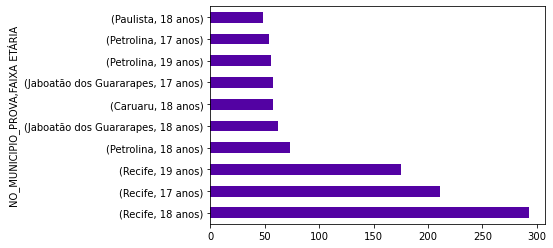

In [144]:
df_menor20.groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

> A grande parte dos jovens vestibulandos são da cidade do Recife.

### 3. Qual o tipo de escola que esses vestibulandos estudam?

In [145]:
print(df_menor20['TIPO DE ESCOLA'].value_counts())
print(df_menor20['TIPO DE ESCOLA'].value_counts(normalize=True)*100)

Público          1708
Não respondeu    1049
Privada           373
Name: TIPO DE ESCOLA, dtype: int64
Público          54.568690
Não respondeu    33.514377
Privada          11.916933
Name: TIPO DE ESCOLA, dtype: float64


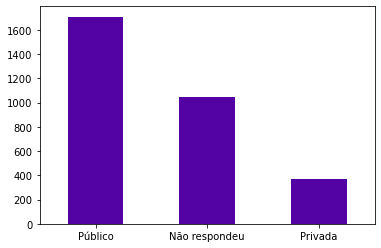

In [146]:
df_menor20['TIPO DE ESCOLA'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

> A maioria dos estudantes que possuem idade menor do que 20 anos e que participaram do Enem 2021, são da escola pública (54,56%). Uma quantidade considerável de estudantes não responderam ao formulário acerca do tipo de escola (33,51%) e 11,91% dos vestibulandos são de escola privada.

### 4. Qual a média das notas de matemática de acordo com a cor/raça?

In [147]:
df2.groupby('COR/RAÇA')['NOTA_MT'].mean()

COR/RAÇA
Amarela          512.720747
Branca           552.462998
Indígena         479.699996
Não declarado    517.442800
Parda            512.681701
Preta            503.018835
Name: NOTA_MT, dtype: float64

In [148]:
df2.groupby('COR/RAÇA')['NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
COR/RAÇA,,,,,,,,
Amarela,110.0,512.720747,105.107781,368.0,433.525,481.658456,595.750,840.2
Branca,1687.0,552.462998,116.145922,354.5,454.650,534.700000,642.250,895.1
Indígena,81.0,479.699996,88.643686,366.3,416.400,444.500000,542.100,747.0
Não declarado,114.0,517.442800,104.368897,357.6,442.400,479.750000,582.075,806.4
Parda,2466.0,512.681701,100.323186,356.3,432.825,489.850000,576.950,922.5
Preta,580.0,503.018835,94.891913,355.9,430.075,480.800000,566.650,953.1


#### Calculando o coeficiente de variação das notas de matemática por cor/raça

In [149]:
round((df2.groupby('COR/RAÇA')['NOTA_MT'].std() / df2.groupby('COR/RAÇA')['NOTA_MT'].mean()) * 100, 2)

COR/RAÇA
Amarela          20.50
Branca           21.02
Indígena         18.48
Não declarado    20.17
Parda            19.57
Preta            18.86
Name: NOTA_MT, dtype: float64

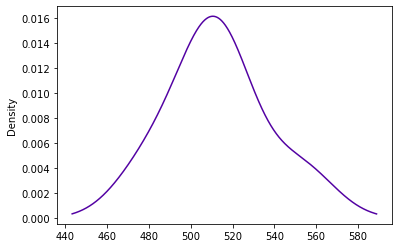

In [150]:
df2.groupby('COR/RAÇA')['NOTA_MT'].mean().plot.density()
plt.show()

In [151]:
mean_race = df2.groupby('COR/RAÇA')['NOTA_MT'].mean()

In [152]:
mean_race = pd.DataFrame(mean_race)

In [153]:
mean_race

,NOTA_MT
COR/RAÇA,
Amarela,512.720747
Branca,552.462998
Indígena,479.699996
Não declarado,517.442800
Parda,512.681701
Preta,503.018835


In [154]:
# Teste de normalidade da distribuicao das notas de matematicas por cor/raca
stats.shapiro(df2.groupby('COR/RAÇA')['NOTA_MT'].mean())

ShapiroResult(statistic=0.9277167320251465, pvalue=0.5625887513160706)

> Através da análise gráfica e a confirmação pelo teste de normalidade de Shapiro-Wilk, pode-se dizer que as notas de matemática dos vestibulandos do Enem 2021 de acordo com a cor/raça tem uma tendência a seguir uma distribuição normal. Além disso, os coeficientes de variação indicam que não há muita heterogeneidade entre as notas baseadas na cor/raça do vestibulando.

### 5. Qual a média das notas de redação de acordo com a situação de conclusão do Ensino Médio?

In [155]:
df2.groupby('SITUAÇÃO DE CONCLUSÃO')['NOTA_REDACAO'].mean()

SITUAÇÃO DE CONCLUSÃO
Estou cursando e concluirei o EM em 2021    596.348136
Já concluí o EM                             632.570544
Não concluí e não estou cursando o EM       612.500000
Name: NOTA_REDACAO, dtype: float64

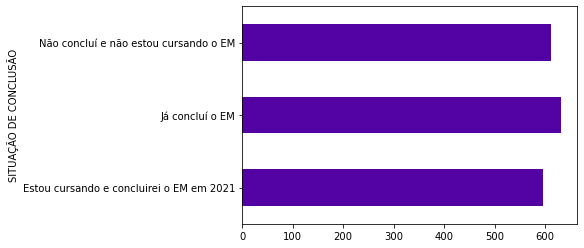

In [163]:
df2.groupby('SITUAÇÃO DE CONCLUSÃO')['NOTA_REDACAO'].mean().plot(kind='barh')

plt.show()

> Pode-se observar que as médias das notas de redação entre os diferentes tipos de situação de conclusão não estão tão distintas.

### 6. Qual a faixa etária mais comum nos vestibulandos que ja concluíram o Ensino Médio?

In [157]:
df2[df2['SITUAÇÃO DE CONCLUSÃO'] == 'Já concluí o EM'].groupby('SITUAÇÃO DE CONCLUSÃO')['FAIXA ETÁRIA'].value_counts().sort_index()

SITUAÇÃO DE CONCLUSÃO  FAIXA ETÁRIA      
Já concluí o EM        17 anos                49
                       18 anos               439
                       19 anos               560
                       20 anos               410
                       21 anos               255
                       22 anos               176
                       23 anos               121
                       24 anos                95
                       25 anos                82
                       Entre 26 e 30 anos    264
                       Entre 31 e 35 anos    116
                       Entre 36 e 40 anos     95
                       Entre 41 e 45 anos     61
                       Entre 46 e 50 anos     43
                       Entre 51 e 55 anos     20
                       Entre 56 e 60 anos     11
                       Entre 61 e 65 anos      4
                       Entre 66 e 70 anos      4
                       Menor de 17 anos        1
Name: FAIXA ETÁRIA, dtype: 

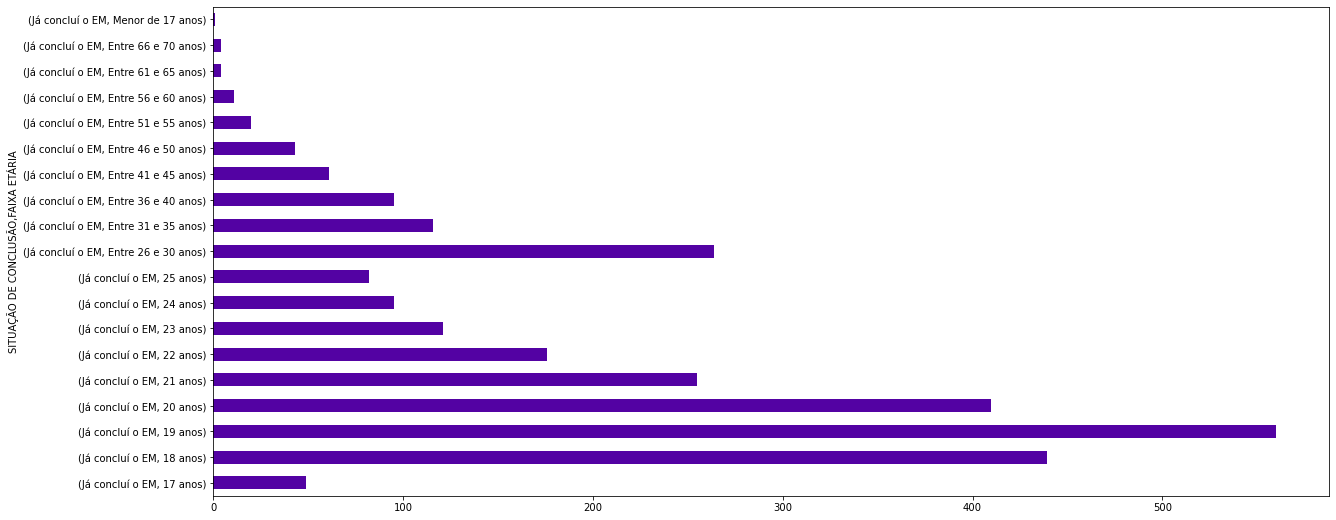

In [158]:
fig, ax = plt.subplots(figsize=(20,9))
df2[df2['SITUAÇÃO DE CONCLUSÃO'] == 'Já concluí o EM'].groupby('SITUAÇÃO DE CONCLUSÃO')['FAIXA ETÁRIA'].value_counts().sort_index().plot(kind='barh')
plt.show()